# Financial and Economic Data Applications

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

In [2]:
%matplotlib inline

In [3]:
%pwd

'/Users/imc023/Documents/PycharmProjects/pydata-book/pydata-book'

## Data munging topics

### Time series and cross-section alignment

In [4]:
close_px = pd.read_csv('ch11/stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('ch11/volume.csv', parse_dates=True, index_col=0)
prices = close_px.loc['2011-09-05':'2011-09-14', ['AAPL', 'JNJ', 'SPX', 'XOM']]
volume = volume.loc['2011-09-05':'2011-09-12', ['AAPL', 'JNJ', 'XOM']]

In [5]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [6]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [7]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [8]:
vwap = (prices * volume).sum() / volume.sum()

In [9]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [10]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [11]:
prices.align(volume, join='inner')

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

In [12]:
s1 = Series(range(3), index=['a', 'b', 'c'])
s2 = Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = Series(range(3), index=['f', 'a', 'c'])
DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,three,two
a,0.0,1.0,NaN
b,1.0,NaN,1.0
c,2.0,2.0,2.0
d,NaN,NaN,0.0
e,NaN,NaN,3.0
f,NaN,0.0,NaN


In [13]:
DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,NaN
c,2.0,2.0,2.0
e,NaN,NaN,3.0


### Operations with time series of different frequencies

In [14]:
ts1 = Series(np.random.randn(3),
             index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1

2012-06-13    0.552501
2012-06-20    1.232631
2012-06-27   -0.249087
Freq: W-WED, dtype: float64

In [15]:
ts1.resample('B').mean()

2012-06-13    0.552501
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20    1.232631
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27   -0.249087
Freq: B, dtype: float64

In [16]:
ts1.resample('B').ffill()

2012-06-13    0.552501
2012-06-14    0.552501
2012-06-15    0.552501
2012-06-18    0.552501
2012-06-19    0.552501
2012-06-20    1.232631
2012-06-21    1.232631
2012-06-22    1.232631
2012-06-25    1.232631
2012-06-26    1.232631
2012-06-27   -0.249087
Freq: B, dtype: float64

In [17]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                          '2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = Series(np.random.randn(6), index=dates)
ts2

2012-06-12   -0.223921
2012-06-17    1.046594
2012-06-18   -1.058383
2012-06-21   -0.137042
2012-06-22    1.045064
2012-06-29   -1.484533
dtype: float64

In [18]:
ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.552501
2012-06-18    0.552501
2012-06-21    1.232631
2012-06-22    1.232631
2012-06-29   -0.249087
dtype: float64

In [19]:
ts2 + ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    1.599095
2012-06-18   -0.505882
2012-06-21    1.095588
2012-06-22    2.277695
2012-06-29   -1.733619
dtype: float64

#### Using periods instead of timestamps

In [20]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [21]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [22]:
infl_q = infl.asfreq('Q-SEP', how='end')

In [23]:
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [24]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### Time of day and "as of" data selection

In [25]:
# Make an intraday date range and time series
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
                        ...  
2012-06-06 15:54:00    1554.0
2012-06-06 15:55:00    1555.0
2012-06-06 15:56:00    1556.0
2012-06-06 15:57:00    1557.0
2012-06-06 15:58:00    1558.0
2012-06-06 15:59:00    1559.0
Length: 1560, dtype: float64

In [26]:
from datetime import time
ts[time(10, 0)]

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [27]:
ts.at_time(time(10, 0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [28]:
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [29]:
np.random.seed(12346)

In [30]:
# Set most of the time series randomly to NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00    23.0
2012-06-01 09:54:00     NaN
2012-06-01 09:55:00    25.0
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00     NaN
dtype: float64

In [31]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      25.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1197.0
Freq: B, dtype: float64

### Splicing together data sources

In [33]:
data1 = DataFrame(np.ones((6, 3), dtype=float),
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/12/2012', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [34]:
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [35]:
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [36]:
spliced.update(data2, overwrite=False)

In [37]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [38]:
cp_spliced = spliced.copy()
cp_spliced[['a', 'c']] = data1[['a', 'c']]
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### Return indexes and cumulative returns

In [42]:
#import pandas.io.data as web
import pandas_datareader.data as web
price = web.get_data_yahoo('AAPL', '2016-01-01')['Adj Close']
price[-5:]

Date
2017-08-16    160.949997
2017-08-17    157.860001
2017-08-18    157.500000
2017-08-21    157.210007
2017-08-22    159.779999
Name: Adj Close, dtype: float64

In [43]:
price['2016-10-03'] / price['2016-3-01'] - 1

0.13218275491986975

In [44]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1  # Set first value to 1
ret_index

Date
2016-01-04    1.000000
2016-01-05    0.974941
2016-01-06    0.955861
2016-01-07    0.915520
2016-01-08    0.920361
2016-01-11    0.935263
                ...   
2017-08-15    1.587572
2017-08-16    1.581186
2017-08-17    1.550830
2017-08-18    1.547293
2017-08-21    1.544444
2017-08-22    1.569692
Name: Adj Close, Length: 413, dtype: float64

In [46]:
m_returns = ret_index.resample('BM').last().pct_change()
m_returns['2017']

Date
2017-01-31    0.047746
2017-02-28    0.133778
2017-03-31    0.048690
2017-04-28   -0.000070
2017-05-31    0.067808
2017-06-30   -0.057214
2017-07-31    0.032704
2017-08-31    0.078514
Freq: BM, Name: Adj Close, dtype: float64

In [48]:
m_rets = (1 + returns).resample('M', kind='period').prod() - 1
m_rets['2017']

Date
2017-01    0.047746
2017-02    0.133778
2017-03    0.048690
2017-04   -0.000070
2017-05    0.067808
2017-06   -0.057214
2017-07    0.032704
2017-08    0.078514
Freq: M, Name: Adj Close, dtype: float64

## Group transforms and analysis

In [49]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10
np.random.seed(12345)

In [51]:
import random; random.seed(0)
import string

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

In [52]:
M = 500
df = DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
                'Value' : np.random.randn(M) / 200 + 0.08,
                'ShortInterest' : np.random.randn(M) / 200 - 0.02},
                index=tickers[:M])

In [53]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                    name='industry')

In [54]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.029485,-0.020739,0.079929
TECH,0.030407,-0.019609,0.080113


In [55]:
by_industry.describe()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="5" halign="left">Momentum</th>
      <th>...</th>
      <th colspan="5" halign="left">Value</th>
    </tr>
    <tr>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>...</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>industry</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FINANCIAL</th>
      <td>246.0</td>
      <td>0.029485</td>
      <td>0.004802</td>
      <td>0.017210</td>
      <td>0.026263</td>
      <td>...</td>
      <td>0.067025</td>
      <td>0.076638</td>
      <td>0.079804</td>
      <td>0.082718</td>
      <td>0.093334</td>
    </tr>
    <tr>
      <th>TECH</th>
      <td>254.0</td>
      <td>0.030407</td>
      <td>0.005303</td>
      <td>0.016778</td>
      <td>0.026456</td>
      <td>...</td>
      <td>0.065253</td>
      <td>0.076737</td>
      <td>0.080296</td>
      <td>0.083353</td>
      <td>0.093081</td>
    </tr>
  </tbody>
</table>
<p>2 rows × 24 columns</p>
</div>

In [56]:
# Within-Industry Standardize
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)

In [57]:
df_stand.groupby(industries).agg(['mean', 'std'])

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">Momentum</th>
      <th colspan="2" halign="left">ShortInterest</th>
      <th colspan="2" halign="left">Value</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
    <tr>
      <th>industry</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FINANCIAL</th>
      <td>1.114736e-15</td>
      <td>1.0</td>
      <td>3.081772e-15</td>
      <td>1.0</td>
      <td>8.001278e-15</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>TECH</th>
      <td>-2.779929e-16</td>
      <td>1.0</td>
      <td>-1.910982e-15</td>
      <td>1.0</td>
      <td>-7.139521e-15</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

In [58]:
# Within-industry rank descending
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">Momentum</th>
      <th colspan="2" halign="left">ShortInterest</th>
      <th colspan="2" halign="left">Value</th>
    </tr>
    <tr>
      <th></th>
      <th>min</th>
      <th>max</th>
      <th>min</th>
      <th>max</th>
      <th>min</th>
      <th>max</th>
    </tr>
    <tr>
      <th>industry</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>FINANCIAL</th>
      <td>1.0</td>
      <td>246.0</td>
      <td>1.0</td>
      <td>246.0</td>
      <td>1.0</td>
      <td>246.0</td>
    </tr>
    <tr>
      <th>TECH</th>
      <td>1.0</td>
      <td>254.0</td>
      <td>1.0</td>
      <td>254.0</td>
      <td>1.0</td>
      <td>254.0</td>
    </tr>
  </tbody>
</table>
</div>

In [59]:
# Industry rank and standardize
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,ShortInterest,Value
MYNBI,-0.091346,-0.976696,-1.004802
QPMZJ,0.794005,1.299919,-0.358356
PLSGQ,-0.541047,-0.836164,-1.679355
EJEYD,-0.583207,-1.623142,0.990749
TZIRW,1.572120,-0.265423,0.374314
ZTEJD,1.395171,0.360703,-1.436006
XCVKP,-0.074863,0.632931,-0.660154
RDLNK,0.238200,-0.319869,0.102086
TUGRP,1.075068,1.665302,1.580983
OQIBZ,1.412345,0.358356,-1.313972


### Group factor exposures

In [60]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

ticker_subset = tickers.take(np.random.permutation(N)[:1000])

# Weighted sum of factors plus noise
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
              index=ticker_subset)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)

In [61]:
factors.corrwith(port)

f1    0.402377
f2   -0.680980
f3    0.168083
dtype: float64

In [62]:
pd.ols(y=port, x=factors).beta

AttributeError: module 'pandas' has no attribute 'ols'

In [63]:
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

In [64]:
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

AttributeError: module 'pandas' has no attribute 'ols'

### Decile and quartile analysis

In [65]:
#import pandas.io.data as web
import pandas_datareader.data as web
data = web.get_data_yahoo('SPY', '2006-01-01')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2930 entries, 2006-01-03 to 2017-08-22
Data columns (total 6 columns):
Open         2930 non-null float64
High         2930 non-null float64
Low          2930 non-null float64
Close        2930 non-null float64
Adj Close    2930 non-null float64
Volume       2930 non-null int64
dtypes: float64(5), int64(1)
memory usage: 160.2 KB


In [70]:
px = data['Adj Close']
returns = px.pct_change()

def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = pd.Series(rets).rolling(lookback, min_periods=lookback - 5).sum()
    return signal.shift(lag)

In [72]:
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').mean().resample('B').ffill()
trade_rets = trade_friday.shift(1) * returns
trade_rets = trade_rets[:len(returns)]

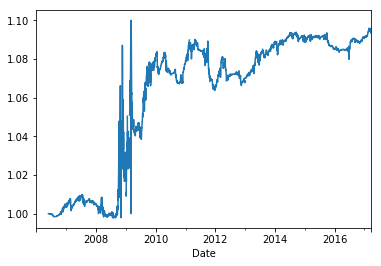

In [73]:
to_index(trade_rets).plot()

In [75]:
vol = pd.Series(returns).rolling(250, min_periods=200).std() * np.sqrt(250)

def sharpe(rets, ann=250):
    return rets.mean() / rets.std()  * np.sqrt(ann)

In [76]:
cats = pd.qcut(vol, 4)
print('cats: %d, trade_rets: %d, vol: %d' % (len(cats), len(trade_rets), len(vol)))

cats: 2930, trade_rets: 2930, vol: 2930


In [77]:
trade_rets.groupby(cats).agg(sharpe)

Adj Close
(0.0786, 0.115]    0.544073
(0.115, 0.152]     0.519753
(0.152, 0.193]     0.032058
(0.193, 0.457]     0.358767
Name: Adj Close, dtype: float64

## More example applications

### Signal frontier analysis

In [84]:
#names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
names = ['AAPL', 'GOOG', 'MSFT']
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = DataFrame({n: get_px(n, '1/1/2016', '6/1/2017') for n in names})

In [85]:
#px = pd.read_csv('ch11/stock_px.csv')

In [86]:
plt.close('all')

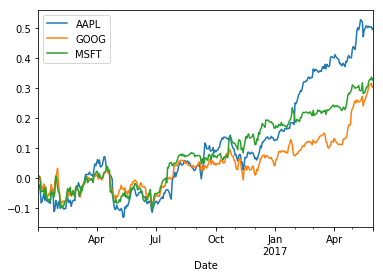

In [87]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()

In [88]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [91]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq).apply(compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [92]:
strat_sr(px, 70, 30)

0.11304917047737925

In [93]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

In [94]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

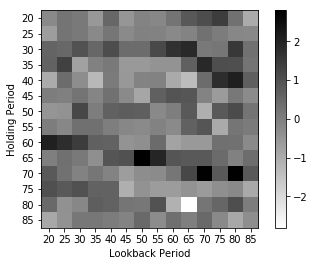

In [95]:
heatmap(ddf)

### Future contract rolling

In [96]:
pd.options.display.max_rows = 10

In [99]:
#import pandas.io.data as web
import pandas_datareader.data as web
# Approximate price of S&P 500 index
px = web.get_data_yahoo('SPY', '2016-01-01')['Adj Close'] * 10
px

Date
2016-01-04    1949.90707
2016-01-05    1953.20511
2016-01-06    1928.56674
2016-01-07    1882.29752
2016-01-08    1861.63651
                 ...    
2017-08-16    2469.40002
2017-08-17    2430.89996
2017-08-18    2427.10007
2017-08-21    2428.99994
2017-08-22    2453.80005
Name: Adj Close, Length: 413, dtype: float64

In [103]:
from datetime import datetime
expiry = {'ESU2': datetime(2016, 9, 21),
          'ESZ2': datetime(2016, 12, 21)}
expiry = Series(expiry).sort_values()

In [104]:
expiry

ESU2   2016-09-21
ESZ2   2016-12-21
dtype: datetime64[ns]

In [105]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [106]:
prices.tail()

,ESU2,ESZ2
2018-05-03,2483.05005,2484.80005
2018-05-04,2469.30005,2471.55005
2018-05-07,2477.30005,2479.05005
2018-05-08,2493.80005,2493.05005
2018-05-09,2473.80005,2471.55005


In [111]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.loc[roll_rng, item] = 1 - decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.loc[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In [113]:
weights = get_roll_weights('6/1/2016', expiry, prices.columns)
weights.loc['2016-09-12':'2016-09-21']

,ESU2,ESZ2
2016-09-12,1.0,0.0
2016-09-13,1.0,0.0
2016-09-14,0.8,0.2
2016-09-15,0.6,0.4
2016-09-16,0.4,0.6
2016-09-19,0.2,0.8
2016-09-20,0.0,1.0
2016-09-21,0.0,1.0


In [114]:
rolled_returns = (prices.pct_change() * weights).sum(1)

### Rolling correlation and linear regression

In [115]:
aapl = web.get_data_yahoo('AAPL', '2016-01-01')['Adj Close']
msft = web.get_data_yahoo('MSFT', '2016-01-01')['Adj Close']

aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

In [116]:
plt.figure()

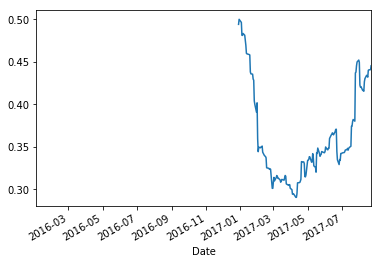

In [119]:
pd.Series(aapl_rets).rolling(250).corr(msft_rets).plot()

In [120]:
plt.figure()

In [121]:
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets}, window=250)
model.beta

AttributeError: module 'pandas' has no attribute 'ols'

In [122]:
model.beta['MSFT'].plot()

NameError: name 'model' is not defined